In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joypy import joyplot
from scipy.special import gamma

1. Simulation of Renewal Process


In [2]:
def simulate_renewal_process(n, interarrival_dist, *params):
    """
    Simulate a renewal process.
    Args:
    - n: Number of renewals to simulate.
    - interarrival_dist: A function for the interarrival times (e.g., np.random.exponential).
    - params: Parameters for the interarrival distribution.
    Returns:
    - renewal_times: Array of renewal times.
    """
    interarrival_times = interarrival_dist(*params, size=n)
    renewal_times = np.cumsum(interarrival_times)  
    return renewal_times

2. Plot the Simulation for Many Trajectories


In [3]:
def plot_renewal_trajectories(num_trajectories, n, interarrival_dist, *params):
    """
    Plot multiple trajectories of a renewal process with each trajectory labeled.
    """
    plt.figure(figsize=(10, 6))
    
    for i in range(num_trajectories):
        renewal_times = simulate_renewal_process(n, interarrival_dist, *params)
        plt.step(range(1, len(renewal_times) + 1), renewal_times, where='post', alpha=0.7, label=f"w{i+1}")
    
    plt.xlabel('Number of Renewals')
    plt.ylabel('Renewal Times')
    plt.title(f'Simulation of {num_trajectories} Renewal Process Trajectories')
    plt.grid()
    plt.legend(title="Trajectories")
    plt.show()

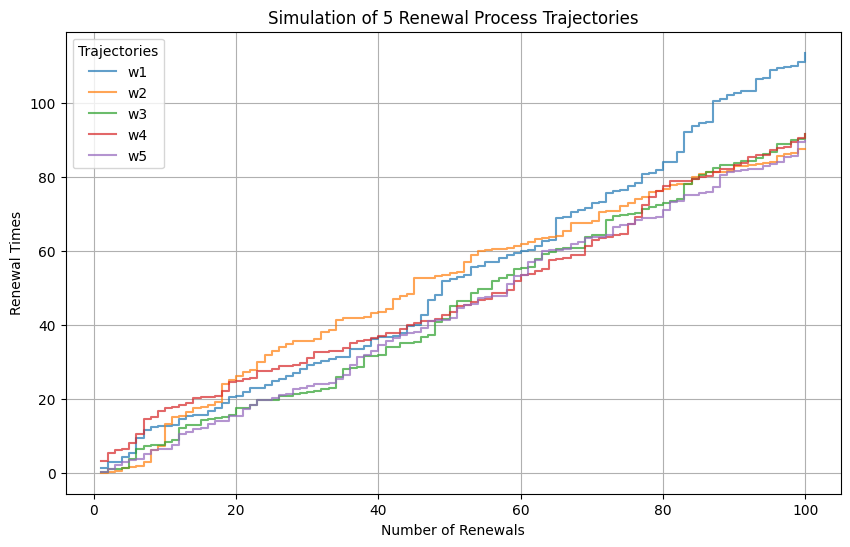

In [4]:
plot_renewal_trajectories(5, 100, np.random.exponential, 1)

3. Find the First Renewal Before a Given Time t

In [5]:
def get_first_renewal_before_t(renewal_times, t):
    return max(renewal_time for renewal_time in renewal_times if renewal_time <= t)


Example

In [6]:
renewal_times = simulate_renewal_process(100, np.random.exponential, 1)
t = 10
first_renewal = get_first_renewal_before_t(renewal_times, t)
print(f"The first renewal time before {t} is {first_renewal}")

The first renewal time before 10 is 9.084022561870395


4. Return an Échantillon of the First Renewals for Each Trajectory

In [7]:
def get_sample_first_renewals(num_trajectories, n, interarrival_dist, *params):
    first_renewals = []
    for _ in range(num_trajectories):
        renewal_times = simulate_renewal_process(n, interarrival_dist, *params)
        first_renewals.append(renewal_times[0])  # First renewal for each trajectory
    return first_renewals
    

Example

In [8]:
sample_first_renewals = get_sample_first_renewals(100, 50, np.random.exponential, 1)
print(sample_first_renewals)

[2.2399606832155463, 0.745200929923665, 0.09473133307997456, 1.5291890576863105, 1.4274351118802322, 0.6277959360443592, 3.2095314287805774, 1.2225970644856916, 1.7494143946375098, 0.6068082338895737, 2.8585189485636993, 1.2417668110080693, 0.2690704167218749, 2.136355051406893, 0.5943901053387487, 0.41692126459517265, 1.324358601003553, 0.14363396125674444, 2.5786049861225666, 2.9499298822901534, 0.14741880359125453, 1.8422031488226784, 0.530025922350832, 0.3027048836302137, 4.164497602706257, 0.16655781939442055, 1.061133019394694, 1.4820685097801622, 0.7075458748831304, 1.0276224473553606, 2.655963270019832, 1.6223959157125818, 0.5210250171680159, 1.875760394010672, 1.1798974825334891, 1.1201095825086373, 0.29737369512284717, 0.6819762533909322, 2.0642508876770056, 0.28252131867669583, 1.637353428690506, 1.414856995760223, 1.6561590311602297, 1.28429354539496, 2.4302238198080537, 0.519576770802631, 0.44198372260132596, 3.6500483239501675, 1.9677027207408835, 0.5462242344457484, 0.82

Generale example

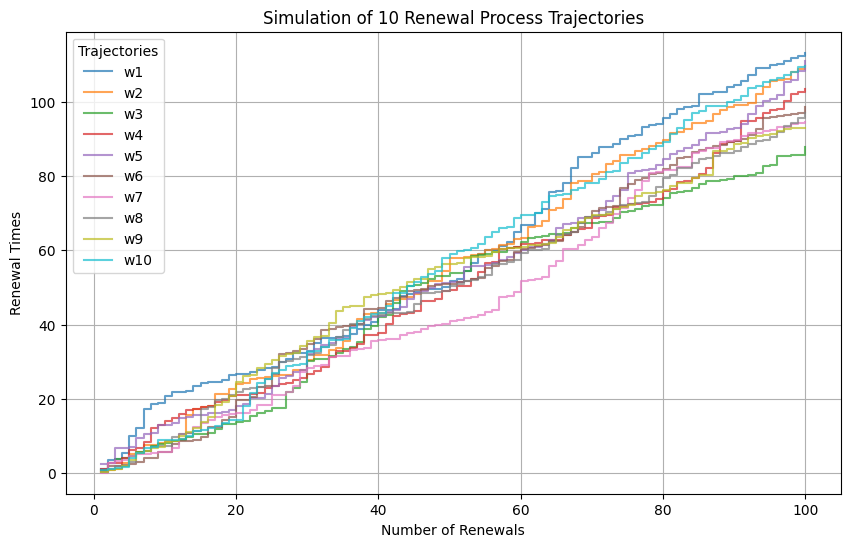

First renewals before t=20: [18.73118146103384, 19.495903583537892, 17.152807388014995, 18.681244603510464, 19.944537836872524, 19.979063215226855, 19.70999169923377, 19.335620233099196, 19.54473749156201, 18.031043940682174]
Sample of first renewals: [0.6377918393873655, 0.3099637297727857, 0.03630640739856712, 0.270342655212238, 0.6463641617033722, 0.6851837739651445, 0.6657799823378081, 0.7696339919335949, 0.09161924699181774, 1.7931403950580875]


In [9]:
num_trajectories = 10
n = 100
t = 20
interarrival_dist = np.random.exponential
lambda_param = 1 

plot_renewal_trajectories(num_trajectories, n, interarrival_dist, lambda_param)


all_first_renewals = []
for _ in range(num_trajectories):
    renewal_times = simulate_renewal_process(n, interarrival_dist, lambda_param)
    first_renewal = get_first_renewal_before_t(renewal_times, t)
    all_first_renewals.append(first_renewal)

print(f"First renewals before t={t}: {all_first_renewals}")

sample_first_renewals = get_sample_first_renewals(num_trajectories, n, interarrival_dist, lambda_param)
print(f"Sample of first renewals: {sample_first_renewals}")


5. Simulate renewal process with different distributions

Simulating with exponential distribution


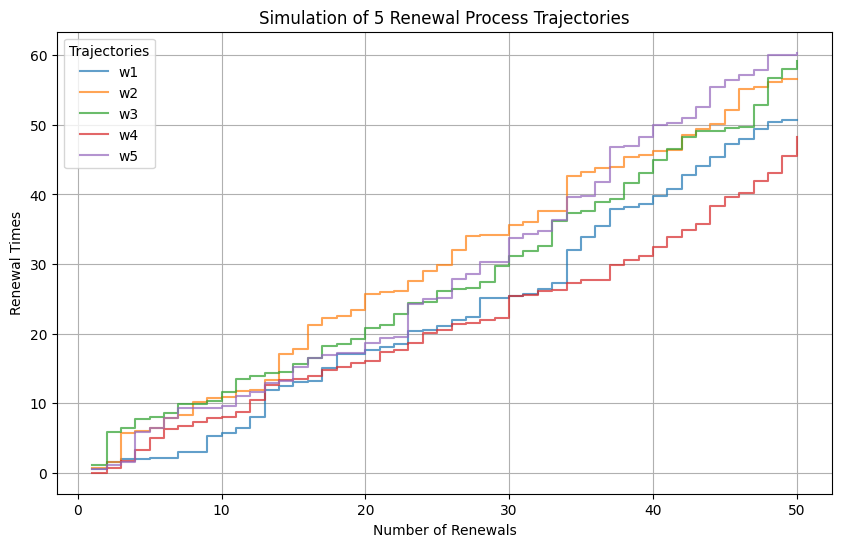

Simulating with uniform distribution


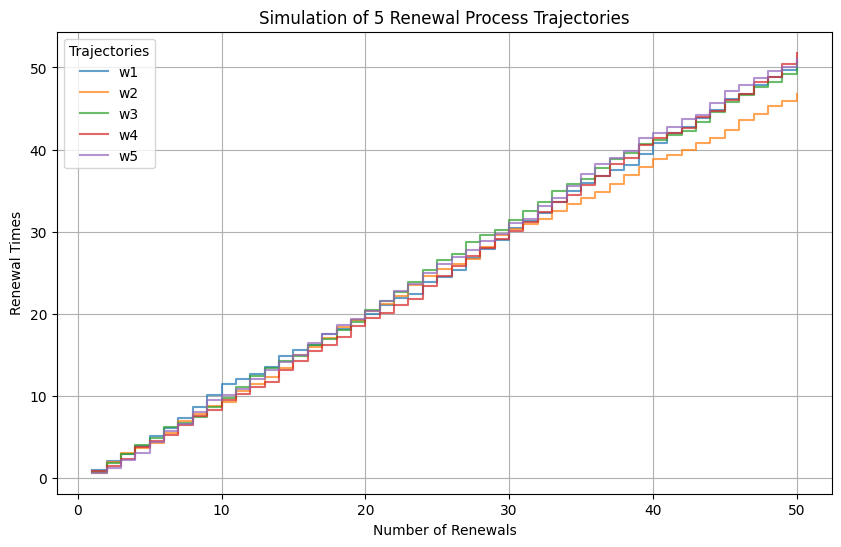

Simulating with normal distribution


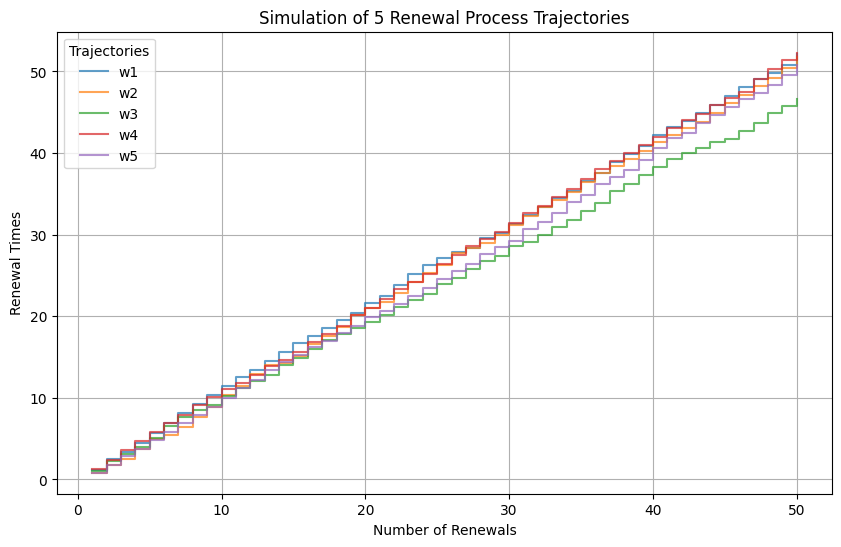

Simulating with gamma distribution


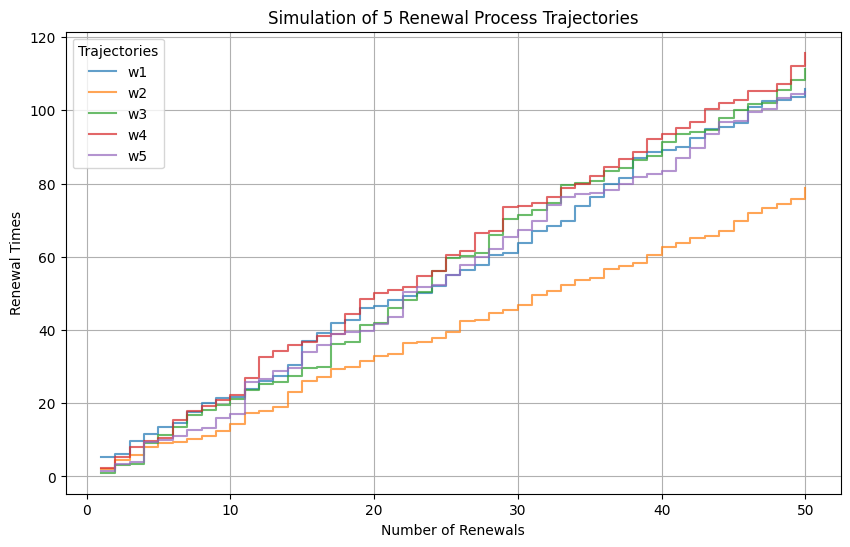

Simulating with weibull distribution


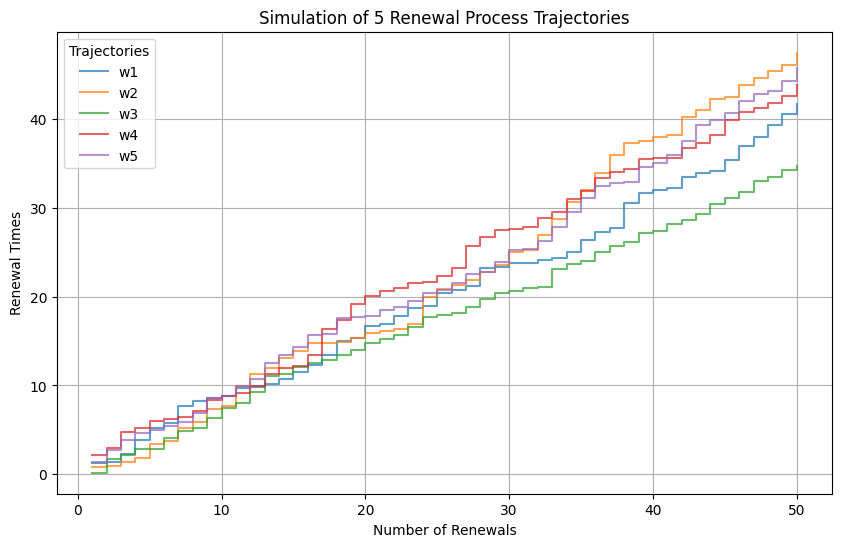

In [10]:
distributions = [
    (np.random.exponential, (1,)),
    (np.random.uniform, (0.5, 1.5)),
    (np.random.normal, (1, 0.2)),
    (np.random.gamma, (2, 1)),
    (np.random.weibull, (1.5,)),
]

for dist, params in distributions:
    print(f"Simulating with {dist.__name__} distribution")
    plot_renewal_trajectories(5, 50, dist, *params)

6. Expected Number of Events by time

In [11]:
def expected_interarrival_time(dist_name, params):
    if dist_name == "exponential":
        λ = params[0]
        return 1 / λ
    elif dist_name == "uniform":
        a, b = params
        return (a + b) / 2
    elif dist_name == "normal":
        μ, σ = params
        return μ
    elif dist_name == "gamma":
        k, θ = params
        return k * θ
    elif dist_name == "weibull":
        k = params[0]
        θ = 1  # Default scale
        return θ * gamma(1 + 1 / k)

In [12]:
t = 10
distributions = [
    ("exponential", (1,)),        # Exponential(λ=1)
    ("uniform", (0.2, 1.5)),      # Uniform(a=0.5, b=1.5)
    ("normal", (1, 0.2)),         # Normal(μ=1, σ=0.2)
    ("gamma", (2, 1)),            # Gamma(shape=2, scale=1)
    ("weibull", (1.5,)),          # Weibull(shape=1.5)
]


In [13]:
for dist_name, params in distributions:
    interarrival_mean = expected_interarrival_time(dist_name, params)
    expected_events = t / interarrival_mean
    print(f"Distribution: {dist_name}, Expected Number of Events by time {t}: {expected_events:.2f}")


Distribution: exponential, Expected Number of Events by time 10: 10.00
Distribution: uniform, Expected Number of Events by time 10: 11.76
Distribution: normal, Expected Number of Events by time 10: 10.00
Distribution: gamma, Expected Number of Events by time 10: 5.00
Distribution: weibull, Expected Number of Events by time 10: 11.08


7. Create the joyplot

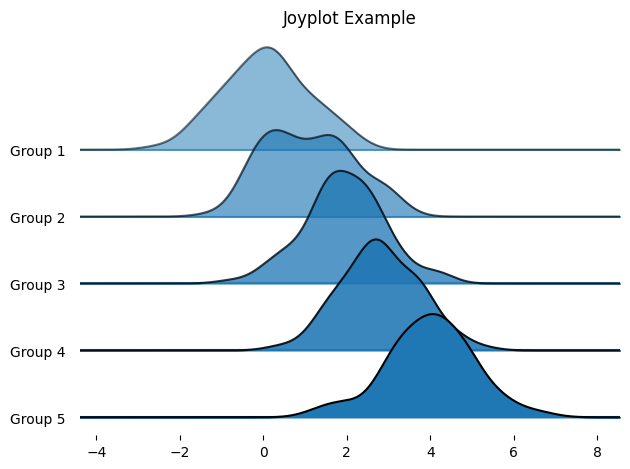

In [14]:
np.random.seed(0)
data = [np.random.normal(loc=i, scale=1, size=100) for i in range(5)]

figsize=(10, 6)
joyplot(
    data,
    labels=[f'Group {i+1}' for i in range(len(data))],
    fade=True, 
    title="Joyplot Example"
)

plt.show()

#### Simulation in the case of Complex or Non-standard Distributions

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, weibull_min, gamma, norm, uniform, beta

1. Generalized Acceptance-Rejection Sampling

In [16]:
def acceptance_rejection_sampling(target_pdf, proposal_sampler, proposal_pdf, c, n_samples):
    """
    Generate samples using the Acceptance-Rejection Method.
    """
    samples = []
    while len(samples) < n_samples:
        x = proposal_sampler()
        u = np.random.uniform(0, 1)
        if u <= target_pdf(x) / (c * proposal_pdf(x)):
            samples.append(x)
    return np.array(samples)
    

2. Sampling Inter-Arrival Times

In [17]:
def sample_interarrival(interarrival_dist, params):
    """
    Sample inter-arrival times using direct sampling or AR Method.
    """
    if interarrival_dist == 'exponential':
        return np.random.exponential(scale=1 / params['rate'])
    elif interarrival_dist == 'weibull':
        return np.random.weibull(params['shape']) * params['scale']
    elif interarrival_dist == 'gamma':
        return np.random.gamma(params['shape'], params['scale'])
    elif interarrival_dist == 'normal':
        return max(0, np.random.normal(params['mean'], params['std']))
    elif interarrival_dist == 'uniform':
        return np.random.uniform(params['low'], params['high'])
    elif interarrival_dist == 'custom':
        
        return acceptance_rejection_sampling(
            params['target_pdf'], params['proposal_sampler'], params['proposal_pdf'], params['c'], 1
        )[0]
    else:
        raise ValueError("Unsupported distribution")

3. Renewal Process Simulation

In [18]:
def renewal_process(interarrival_dist, params, T):

    t = 0
    event_times = [t]
    interarrival_times = []
    
    while t <= T:
        interarrival = sample_interarrival(interarrival_dist, params)
        if interarrival > 0:
            t += interarrival
            if t <= T:
                event_times.append(t)
                interarrival_times.append(interarrival)
    
    return np.array(event_times), np.array(interarrival_times)

 4. Plot Number of Events Over Time

In [19]:
def plot_number_of_events(event_times, T):
    time_grid = np.linspace(0, T, 500)
    event_counts = [np.sum(event_times <= t) for t in time_grid]
    
    plt.figure(figsize=(10, 6))
    plt.step(time_grid, event_counts, where='post', color='b', lw=2)
    plt.xlabel('Time (t)')
    plt.ylabel('Number of Events')
    plt.title('Number of Events Over Time in a Renewal Process')
    plt.grid(True)
    plt.show()

5. Plot Histogram of Inter-Arrival Times

In [20]:
def plot_interarrival_histogram(interarrival_times):
    plt.figure(figsize=(10, 6))
    plt.hist(interarrival_times, bins=30, density=True, alpha=0.7, color='g')
    plt.xlabel('Inter-Arrival Time')
    plt.ylabel('Density')
    plt.title('Histogram of Inter-Arrival Times')
    plt.grid(True)
    plt.show()


6. Plot Empirical vs Theoretical Mean-Value Function

In [21]:
def plot_mean_value_function(interarrival_dist, params, T, N_paths):
    """
    Compare empirical mean-value function with theoretical predictions.
    """
    time_grid = np.linspace(0, T, 500)
    empirical_means = np.zeros((N_paths, len(time_grid)))
    
    for i in range(N_paths):
        event_times, _ = renewal_process(interarrival_dist, params, T)
        N_t = [np.sum(event_times <= t) for t in time_grid]
        empirical_means[i, :] = N_t
    
    empirical_mean = np.mean(empirical_means, axis=0)
    theoretical_mean = (1 / params.get('mean', 1)) * time_grid

    plt.figure(figsize=(12, 6))
    plt.plot(time_grid, empirical_mean, color='red', lw=2, label='Empirical Mean-Value Function')
    plt.plot(time_grid, theoretical_mean, color='black', lw=2, linestyle='--', label='Theoretical Mean-Value Function')
    plt.xlabel('Time (t)')
    plt.ylabel('Mean Number of Events')
    plt.title('Empirical vs Theoretical Mean-Value Function')
    plt.legend()
    plt.grid(True)
    plt.show()

7. Plot Strong Law of Renewal Processes (SRLP)

In [25]:
def plot_slrp(interarrival_dist, params, T, N_paths):
    """
    Verify the Strong Law of Large Numbers.
    """
    time_grid = np.linspace(1, T, 500)
    event_rates = np.zeros((N_paths, len(time_grid)))
    
    for i in range(N_paths):
        event_times, _ = renewal_process(interarrival_dist, params, T)
        N_t = [np.sum(event_times <= t) for t in time_grid]
        event_rates[i, :] = np.array(N_t) / time_grid
    
    theoretical_rate = 1 / params['mean']

    plt.figure(figsize=(12, 6))
    plt.plot(time_grid, np.mean(event_rates, axis=0), color='red', lw=2, label='Empirical Event Rate')
    plt.axhline(y=theoretical_rate, color='black', linestyle='--', lw=2, label='Theoretical Event Rate')
    plt.xlabel('Time (t)')
    plt.ylabel('Event Rate (N(t)/t)')
    plt.title('Strong Law of Renewal Processes (SLRP)')
    plt.legend()
    plt.grid(True)
    plt.show()

Example

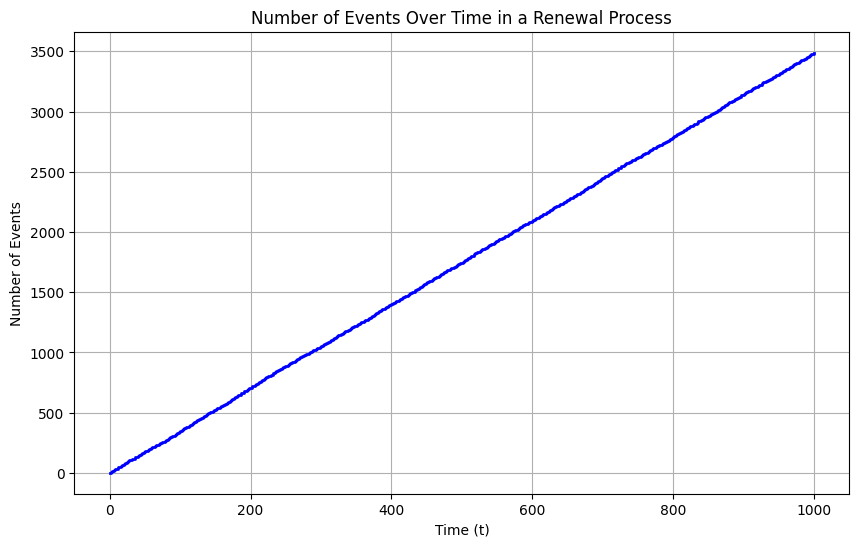

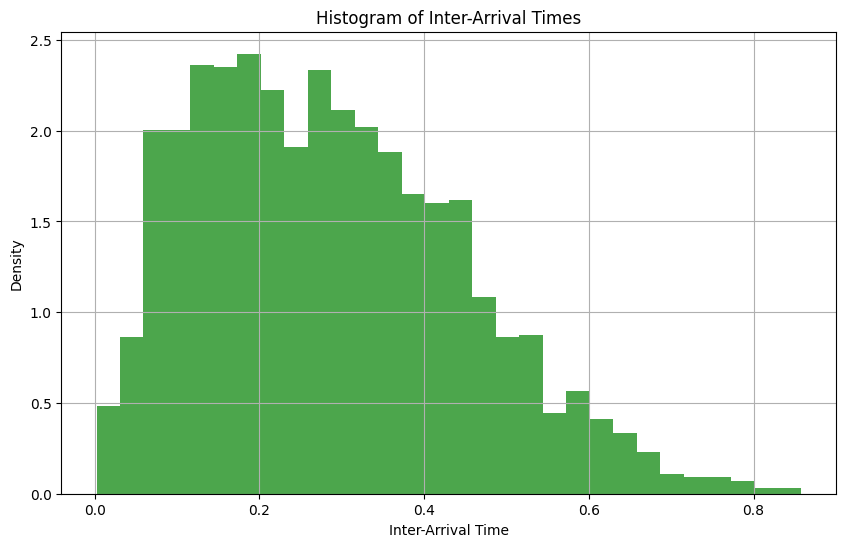

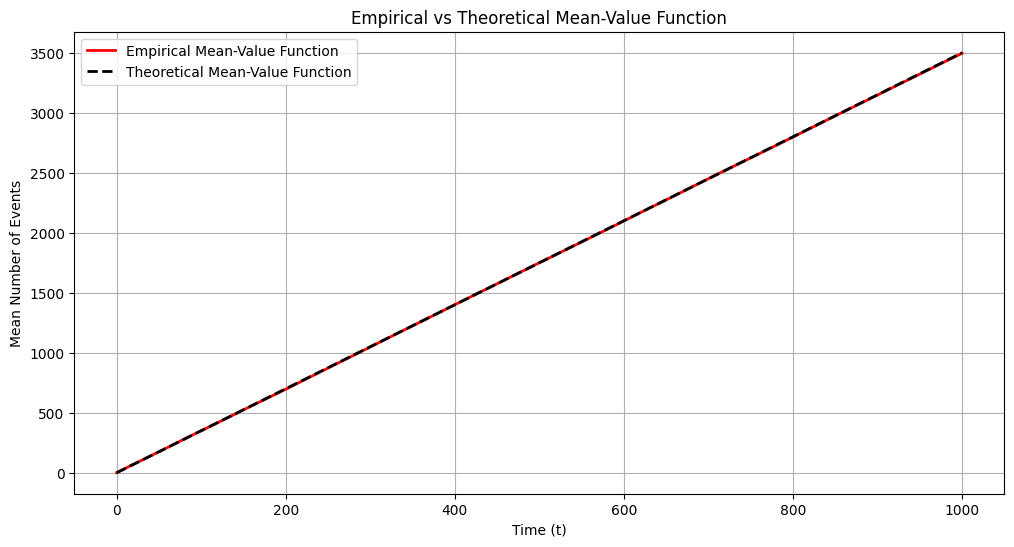

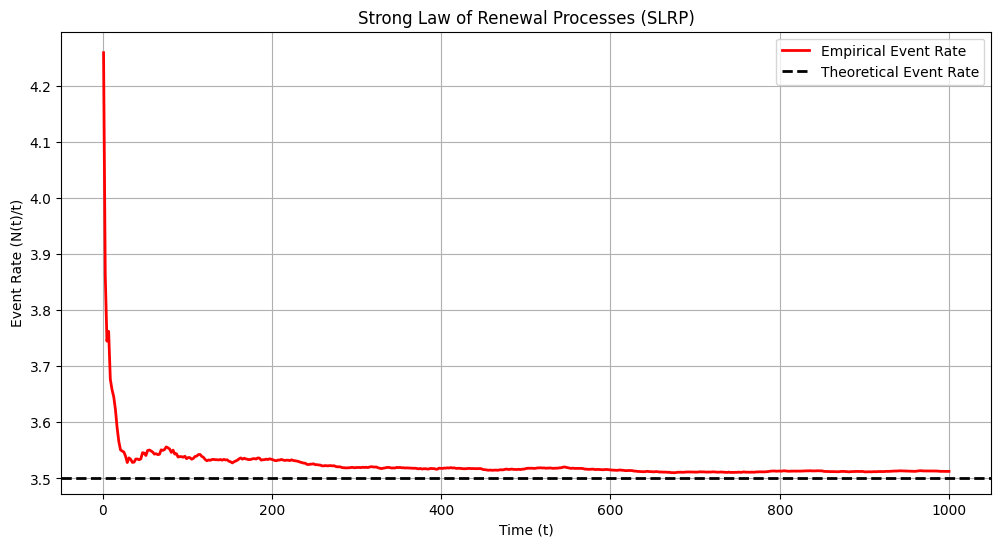

In [26]:
if __name__ == "__main__":
    T = 1000
    N_paths = 50

    params_custom = {
        'target_pdf': lambda x: beta.pdf(x, 2, 5),
        'proposal_sampler': lambda: np.random.uniform(0, 1),
        'proposal_pdf': lambda x: uniform.pdf(x, 0, 1),
        'c': 2.5,
        'mean': 2 / (2 + 5)
    }

    event_times, interarrival_times = renewal_process('custom', params_custom, T)
    plot_number_of_events(event_times, T)
    plot_interarrival_histogram(interarrival_times)
    plot_mean_value_function('custom', params_custom, T, N_paths)
    plot_slrp('custom', params_custom, T, N_paths)
